In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from math import sqrt
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [221]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [222]:
data.shape

(1460, 81)

## Препроцессинг данных

In [223]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [224]:
data = data.drop(columns=['Id'])

## Последующие задания

In [225]:
from sklearn.model_selection import train_test_split

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

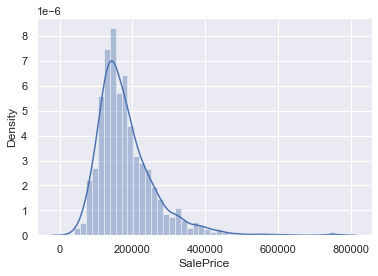

In [226]:
sns.distplot(y_train)

In [227]:
numeric = list(X.dtypes[X.dtypes != "object"].index)
X_train = X_train[numeric]
X_test = X_test[numeric]
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [228]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

In [229]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8301388056822957

In [230]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8303219729837285

In [231]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8301569000695334

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [232]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
from sklearn.metrics import make_scorer, mean_squared_error
RMSE = make_scorer(lambda y_pred, y: sqrt(mean_squared_error(y_pred, y)))

In [233]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

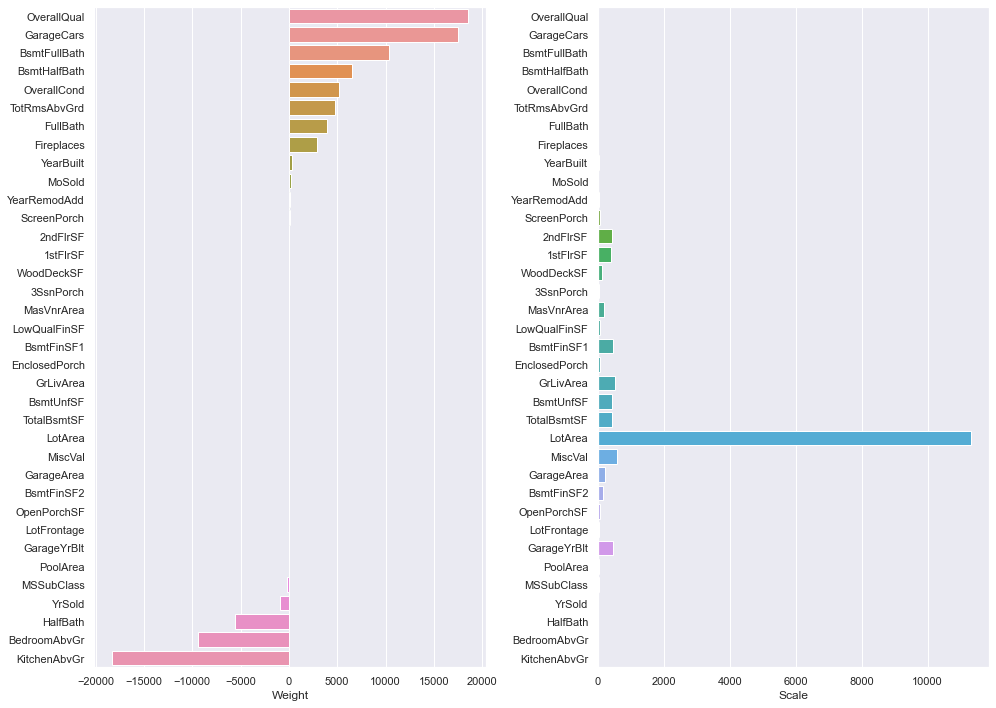

In [234]:
show_weights(numeric, model.coef_, X_train[numeric].std())

In [235]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train_scaled = scaler.transform(X_train[numeric])

In [236]:
model = Lasso()
model.fit(X_train_scaled, y_train)
# model.score(X_test, y_test)

Lasso()

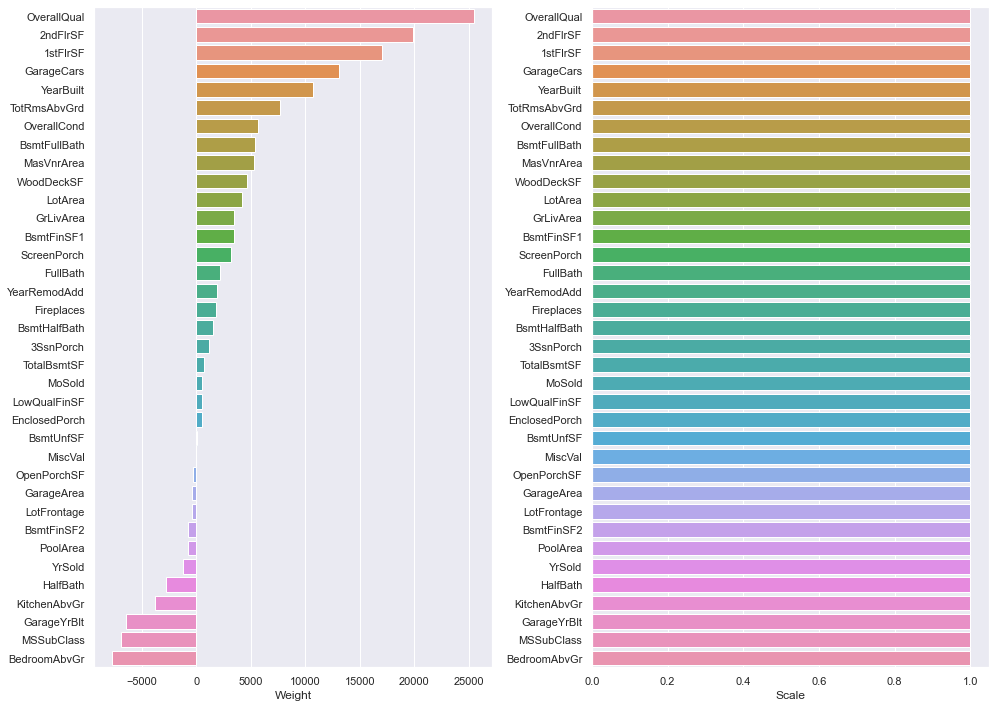

In [237]:
scales = pd.Series(data=X_train_scaled.std(axis=0))
show_weights(numeric, model.coef_, scales)

In [238]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO
from sklearn.model_selection import GridSearchCV

In [239]:
gbr_grid_search = GridSearchCV(Ridge(), 
                               [{'alpha': np.logspace(-4, -0.5, 10)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)

gbr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-04, 2.44843675e-04, 5.99484250e-04, 1.46779927e-03,
       3.59381366e-03, 8.79922544e-03, 2.15443469e-02, 5.27499706e-02,
       1.29154967e-01, 3.16227766e-01])}],
             scoring=make_scorer(<lambda>))

In [240]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 0.0001}
41333.730693899175
Ridge(alpha=0.0001)


In [241]:
gbr_grid_search = GridSearchCV(Lasso(), 
                               [{'alpha': np.logspace(-4, -0.5, 10)}],
                               cv=5,
                               error_score='raise',
                               scoring=RMSE,
                               verbose=0)
gbr_grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-04, 2.44843675e-04, 5.99484250e-04, 1.46779927e-03,
       3.59381366e-03, 8.79922544e-03, 2.15443469e-02, 5.27499706e-02,
       1.29154967e-01, 3.16227766e-01])}],
             scoring=make_scorer(<lambda>))

In [242]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'alpha': 0.0001}
41333.73195122268
Lasso(alpha=0.0001)


In [243]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)

In [249]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [256]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

-9.46942490317548e+21

In [254]:
model = Ridge(alpha=0.0001)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.830148346412418

In [253]:
model = Lasso(alpha=0.0001)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.8314390642889395

5.362416638473612e-16

In [204]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [205]:
X_train[categorical].sample(5)

""
105
552
1101
691
1339


In [206]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

In [207]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 36)


NameError: name 'column_transformer' is not defined

In [208]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

In [209]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

NameError: name 'pipeline' is not defined

In [210]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

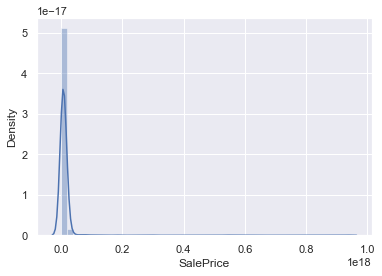

In [211]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [212]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO

In [213]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

NameError: name 'mask' is not defined

In [214]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO